In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
car = pd.read_csv("cardekho.csv")

In [16]:
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [17]:
car.shape

(8128, 12)

In [33]:
total_missing = car.isnull().sum().sum()
print("Total number of missing values:", total_missing)

Total number of missing values: 878


In [19]:
dt = car.dtypes
dt

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

In [35]:
zeros = (car == 0).sum().sum()
print("Total number of missing values:", zeros)

Total number of missing values: 17


In [21]:
mean_mileage = car['mileage(km/ltr/kg)'].mean()
mean_mileage

19.41878335651954

In [26]:
car.corr()

C:\Users\Asutosh\AppData\Local\Temp\ipykernel_16228\2754339606.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car.corr()


,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
year,1.000000,0.414092,-0.418006,0.329145,0.018848,-0.009144
selling_price,0.414092,1.000000,-0.225534,-0.126054,0.455734,0.041358
km_driven,-0.418006,-0.225534,1.000000,-0.173073,0.205914,0.227336
mileage(km/ltr/kg),0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.452085
engine,0.018848,0.455734,0.205914,-0.575831,1.000000,0.610309
seats,-0.009144,0.041358,0.227336,-0.452085,0.610309,1.000000


In [29]:
dataframe = car.iloc[:, [0, 2, 3]]
dataframe.columns = ['name', 'mileage(km/ltr/kg)', 'engine']

x = dataframe['mileage(km/ltr/kg)']
y = dataframe['engine']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Print the shapes of the training and testing sets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (6096,)
x_test shape: (2032,)
y_train shape: (6096,)
y_test shape: (2032,)


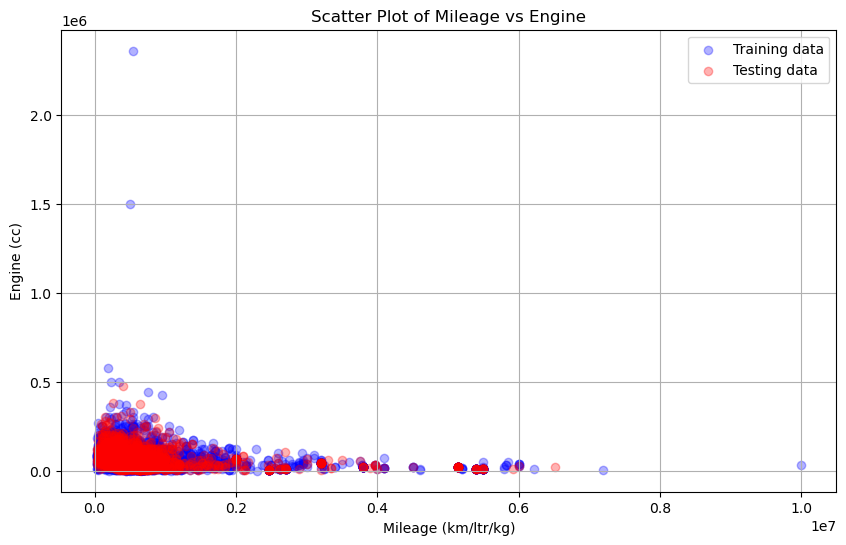

In [32]:
from sklearn.model_selection import train_test_split
# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', alpha=0.3, label='Training data')
plt.scatter(x_test, y_test, color='red', alpha=0.3, label='Testing data')

# Add labels and title
plt.xlabel('Mileage (km/ltr/kg)')
plt.ylabel('Engine (cc)')
plt.title('Scatter Plot of Mileage vs Engine')
plt.legend()
plt.grid(True)
plt.show()